# Public Water Tank Level Monitoring Analysis
+ From: Minor 1 – Pandas
+ Extension: Analyze water levels → shortage prediction
+ Add-ons: Line plots, threshold alerts
+ Difficulty: Medium"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("public_water_tank_data.csv")


In [5]:
df=pd.DataFrame(data)
df

,Day,Daily_Consumption_Liters,Tank_Capacity_Liters
0,1,8500,150000
1,2,9200,150000
2,3,9800,150000
3,4,10500,150000
4,5,11000,150000
5,6,10200,150000
6,7,11500,150000
7,8,12000,150000
8,9,12500,150000
9,10,13000,150000


In [10]:
df['water_remaining']=(df['Tank_Capacity_Liters']-df['Daily_Consumption_Liters'].cumsum())
df['percentage_of_water_remaining']=(df['water_remaining']/df['Tank_Capacity_Liters'])*100
df

,Day,Daily_Consumption_Liters,Tank_Capacity_Liters,water_remaining,percentage_of_water_remaining
0,1,8500,150000,141500,94.333333
1,2,9200,150000,132300,88.200000
2,3,9800,150000,122500,81.666667
3,4,10500,150000,112000,74.666667
4,5,11000,150000,101000,67.333333
5,6,10200,150000,90800,60.533333
6,7,11500,150000,79300,52.866667
7,8,12000,150000,67300,44.866667
8,9,12500,150000,54800,36.533333
9,10,13000,150000,41800,27.866667


In [12]:
Av_Daily_Consumption=df['Daily_Consumption_Liters'].mean()
print("average water consumption in a day:",Av_Daily_Consumption)

average water consumption in a day: 10820.0


In [15]:
The_last_day=150000/ Av_Daily_Consumption
print("the day upto which we will get out of water will be:",int(The_last_day+1))

the day upto which we will get out of water will be: 14


In [16]:
day=12
water=150000-(Av_Daily_Consumption*day)
print(f'the water left at {day} is : ',water)

the water left at 12 is :  20160.0


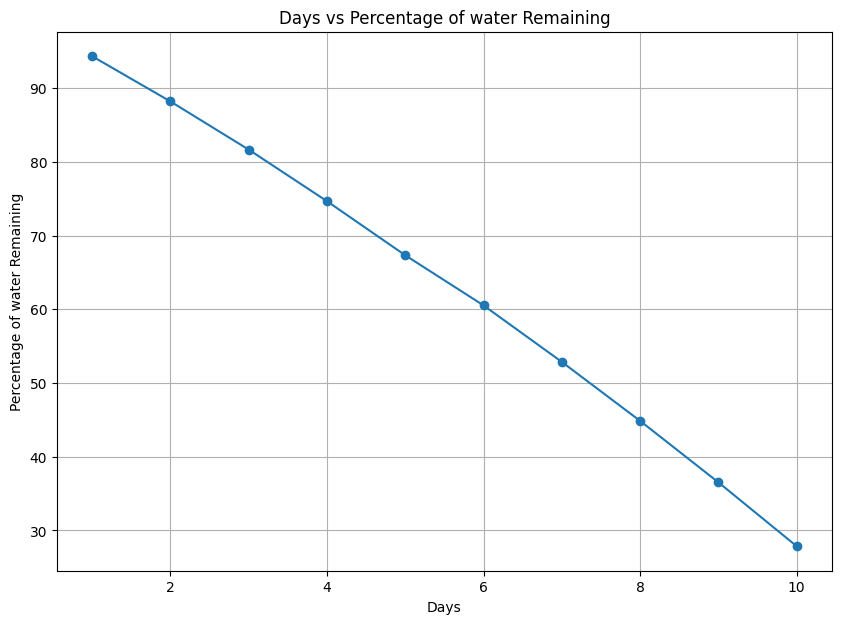

In [17]:
plt.figure(figsize=(10,7))
plt.plot(df['Day'],df['percentage_of_water_remaining'],marker='o')
plt.xlabel('Days')
plt.ylabel('Percentage of water Remaining')
plt.title("Days vs Percentage of water Remaining")
plt.grid()
plt.show()

In [18]:
Theshold=50000
df['Singnal']=df['water_remaining'].apply(lambda x: 'Level Ok' if x>Theshold else 'Warning')
df

,Day,Daily_Consumption_Liters,Tank_Capacity_Liters,water_remaining,percentage_of_water_remaining,Singnal
0,1,8500,150000,141500,94.333333,Level Ok
1,2,9200,150000,132300,88.200000,Level Ok
2,3,9800,150000,122500,81.666667,Level Ok
3,4,10500,150000,112000,74.666667,Level Ok
4,5,11000,150000,101000,67.333333,Level Ok
5,6,10200,150000,90800,60.533333,Level Ok
6,7,11500,150000,79300,52.866667,Level Ok
7,8,12000,150000,67300,44.866667,Level Ok
8,9,12500,150000,54800,36.533333,Level Ok
9,10,13000,150000,41800,27.866667,Warning
